<a href="https://colab.research.google.com/github/Elkhawaga9/taxi-price-prediction/blob/master/project_ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/uber.csv")

In [ ]:
print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


(200000, 9)

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('key', axis=1)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


<Axes: xlabel='passenger_count', ylabel='count'>

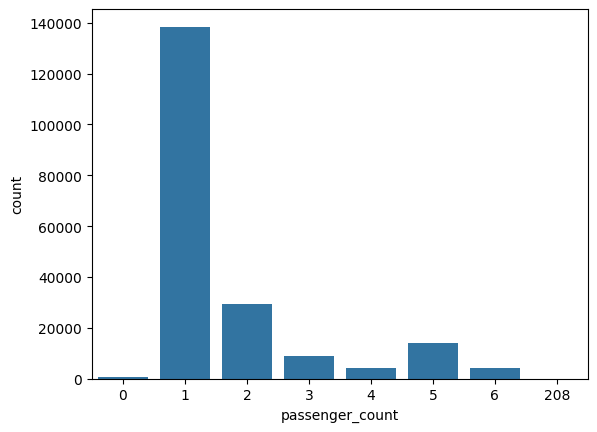

In [ ]:
sns.countplot(x=data['passenger_count'])

In [ ]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(data)

In [ ]:
data = data.dropna()

In [ ]:
import datetime as dt
# Convert the 'pickup_datetime' column to datetime if it's not already in datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['Year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day_of_Week'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour

data = data.drop('pickup_datetime',axis = 1)
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.000305,0.015137,2015,5,7,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.000355,0.022100,2009,7,17,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.042478,0.031877,2009,8,24,0,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.010808,0.012505,2009,6,26,4,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.048059,0.017162,2014,8,28,3,17


In [ ]:
print(sum(data['fare_amount'] > 50))


2606


In [ ]:
#drop rows which contain zeroes
data = data[(data['pickup_longitude'] != 0) & (data['pickup_latitude'] != 0) & (data['dropoff_longitude'] != 0) & (data['dropoff_latitude'] != 0)]
#drop fare amount and passenger_count
data = data[(data['fare_amount']>0) & (data['fare_amount']<=40)]

data.shape

(190509, 13)

In [ ]:
print(data.describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  190509.000000     190509.000000    190509.000000      190509.000000   
mean       10.135525        -73.935691        40.709578         -73.921336   
std         6.338121          5.481794         5.460959           8.611416   
min         0.010000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992400        40.737047         -73.991601   
50%         8.100000        -73.982268        40.753572         -73.980657   
75%        12.100000        -73.969117        40.767667         -73.966049   
max        40.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  abs_diff_longitude  \
count     190509.000000    190509.000000       190509.000000   
mean          40.692123         1.683480            0.070812   
std            3.990781         1.389806            6.694383   
min         -881.985513         0.000000 

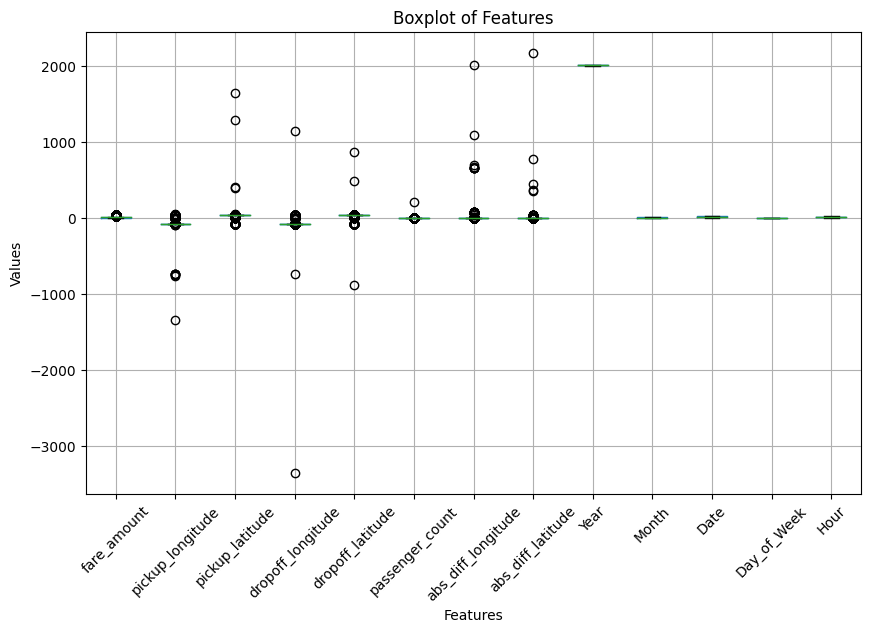

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(rot=45)
plt.title('Boxplot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

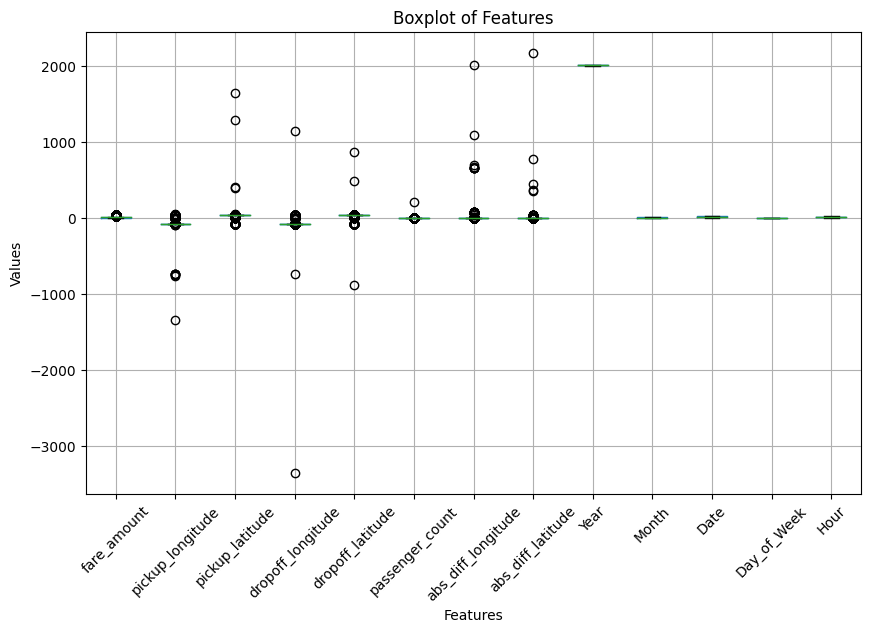

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(rot=45)
plt.title('Boxplot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

In [ ]:
for x in  data.columns:
  Q3,Q1 = np.percentile(data.loc[:,x],[75,25])
  IQR = Q3-Q1

  max = Q3+(1.5*IQR)
  min = Q1-(1.5*IQR)

  data.loc[data[x] > max,x] = max
  data.loc[data[x] <min,x] = min


In [ ]:
data.shape


(190509, 13)

In [ ]:
print(data.duplicated().sum())
data.drop_duplicates()

0


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,0.000305,0.015137,2015.0,5,7.0,3,19
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,0.000355,0.022100,2009.0,7,17.0,4,20
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,0.042478,0.031877,2009.0,8,24.0,0,21
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,0.010808,0.012505,2009.0,6,26.0,4,8
4,16.00,-73.934192,40.744085,-73.973082,40.761247,3.5,0.047840,0.017162,2014.0,8,28.0,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,0.000517,0.000930,2012.0,10,28.0,6,10
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,0.021950,0.002783,2014.0,3,14.0,4,1
199997,21.25,-73.986017,40.756487,-73.927721,40.692588,2.0,0.047840,0.054792,2009.0,6,29.0,0,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,0.013908,0.030037,2015.0,5,20.0,2,14


In [ ]:
def haversine_distance(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lon1_rad = np.radians(lon1)
    lat1_rad = np.radians(lat1)
    lon2_rad = np.radians(lon2)
    lat2_rad = np.radians(lat2)

    # Calculate the differences
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Calculate the distance using Haversine formula
    # the haversine of half the central angle using the differences in latitudes and longitudes between two points on the Earth's surface.
    #the central angle (c) between the two points.
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Calculate the distance for each row in the DataFrame
data['distance_km'] = haversine_distance(data['pickup_longitude'], data['pickup_latitude'],
                                         data['dropoff_longitude'], data['dropoff_latitude'])

In [ ]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour,distance_km
fare_amount,1.000000,0.085749,-0.063967,0.203398,-0.089258,0.013911,0.690862,0.698807,0.137529,0.030914,0.005210,0.017035,-0.022137,0.797181
pickup_longitude,0.085749,1.000000,0.557016,0.397241,0.238337,-0.018116,0.147720,-0.027346,-0.002455,0.000435,-0.002823,-0.025510,0.007757,-0.005577
pickup_latitude,-0.063967,0.557016,1.000000,0.211891,0.498225,-0.013827,-0.015205,-0.085244,-0.006789,0.000389,-0.003111,-0.049958,0.038583,-0.061418
dropoff_longitude,0.203398,0.397241,0.211891,1.000000,0.477884,-0.011846,0.313996,0.059842,0.006239,0.001051,-0.005859,-0.005723,-0.047145,0.153032
dropoff_latitude,-0.089258,0.238337,0.498225,0.477884,1.000000,-0.007404,0.015167,-0.074269,-0.004798,0.000272,-0.003533,-0.035337,0.016937,-0.041943
passenger_count,0.013911,-0.018116,-0.013827,-0.011846,-0.007404,1.000000,-0.001022,0.007886,-0.010457,0.010731,0.003369,0.050253,0.020365,0.005337
abs_diff_longitude,0.690862,0.147720,-0.015205,0.313996,0.015167,-0.001022,1.000000,0.443675,0.004474,0.008735,0.003143,0.022308,-0.051691,0.693302
abs_diff_latitude,0.698807,-0.027346,-0.085244,0.059842,-0.074269,0.007886,0.443675,1.000000,0.005885,0.006727,0.005984,0.036911,-0.017468,0.892703
Year,0.137529,-0.002455,-0.006789,0.006239,-0.004798,-0.010457,0.004474,0.005885,1.000000,-0.115319,-0.011552,0.006187,0.002523,0.002237
Month,0.030914,0.000435,0.000389,0.001051,0.000272,0.010731,0.008735,0.006727,-0.115319,1.000000,-0.016901,-0.009470,-0.004151,0.007845


In [ ]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,0.000305,0.015137,2015.0,5,7.0,3,19,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,0.000355,0.022100,2009.0,7,17.0,4,20,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,0.042478,0.031877,2009.0,8,24.0,0,21,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,0.010808,0.012505,2009.0,6,26.0,4,8,1.661683
4,16.00,-73.934192,40.744085,-73.973082,40.761247,3.5,0.047840,0.017162,2014.0,8,28.0,3,17,3.791134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,0.000517,0.000930,2012.0,10,28.0,6,10,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,0.021950,0.002783,2014.0,3,14.0,4,1,1.875050
199997,21.25,-73.986017,40.756487,-73.927721,40.692588,2.0,0.047840,0.054792,2009.0,6,29.0,0,0,8.638146
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,0.013908,0.030037,2015.0,5,20.0,2,14,3.539715


In [ ]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour,distance_km
fare_amount,1.000000,0.085749,-0.063967,0.203398,-0.089258,0.013911,0.690862,0.698807,0.137529,0.030914,0.005210,0.017035,-0.022137,0.797181
pickup_longitude,0.085749,1.000000,0.557016,0.397241,0.238337,-0.018116,0.147720,-0.027346,-0.002455,0.000435,-0.002823,-0.025510,0.007757,-0.005577
pickup_latitude,-0.063967,0.557016,1.000000,0.211891,0.498225,-0.013827,-0.015205,-0.085244,-0.006789,0.000389,-0.003111,-0.049958,0.038583,-0.061418
dropoff_longitude,0.203398,0.397241,0.211891,1.000000,0.477884,-0.011846,0.313996,0.059842,0.006239,0.001051,-0.005859,-0.005723,-0.047145,0.153032
dropoff_latitude,-0.089258,0.238337,0.498225,0.477884,1.000000,-0.007404,0.015167,-0.074269,-0.004798,0.000272,-0.003533,-0.035337,0.016937,-0.041943
passenger_count,0.013911,-0.018116,-0.013827,-0.011846,-0.007404,1.000000,-0.001022,0.007886,-0.010457,0.010731,0.003369,0.050253,0.020365,0.005337
abs_diff_longitude,0.690862,0.147720,-0.015205,0.313996,0.015167,-0.001022,1.000000,0.443675,0.004474,0.008735,0.003143,0.022308,-0.051691,0.693302
abs_diff_latitude,0.698807,-0.027346,-0.085244,0.059842,-0.074269,0.007886,0.443675,1.000000,0.005885,0.006727,0.005984,0.036911,-0.017468,0.892703
Year,0.137529,-0.002455,-0.006789,0.006239,-0.004798,-0.010457,0.004474,0.005885,1.000000,-0.115319,-0.011552,0.006187,0.002523,0.002237
Month,0.030914,0.000435,0.000389,0.001051,0.000272,0.010731,0.008735,0.006727,-0.115319,1.000000,-0.016901,-0.009470,-0.004151,0.007845


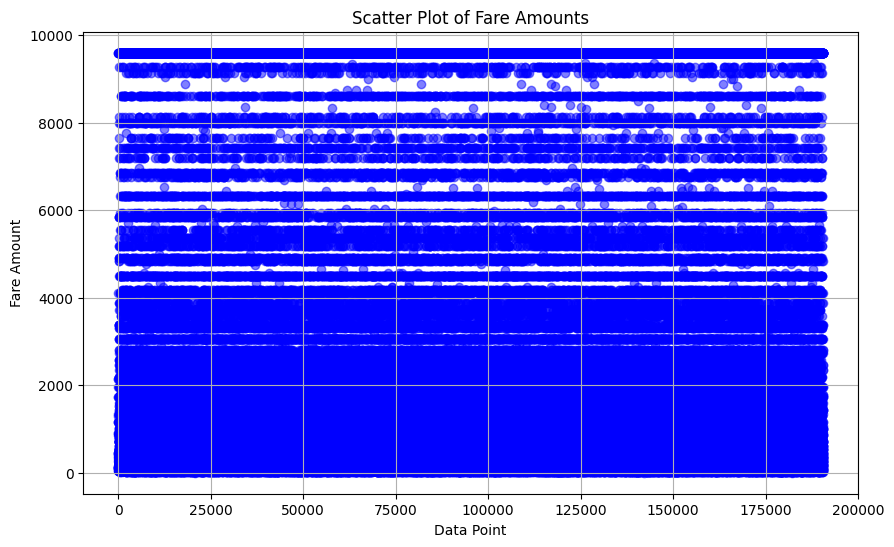

In [ ]:
fare_amounts = data['fare_amount']**3

# Plotting the fare amounts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(fare_amounts)), fare_amounts, color='b', alpha=0.5)
plt.title('Scatter Plot of Fare Amounts')
plt.xlabel('Data Point')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
X = data.drop('fare_amount', axis=1)
Y = data['fare_amount']
dn =  normalize.fit_transform(X)
xx = pd.DataFrame(dn, columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (171458, 13)
x_test:  (19051, 13)
y_train:  (171458,)
y_test:  (19051,)


In [ ]:
#for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))

Mean Squared Error: 7.198338849278338
Mean absolute Error: 1.8962598261361407
Root Mean Squared Error (RMSE): 2.682972017982733
R-squared (R2): 0.7077339170629193
The accuracy of our model is 71.0%


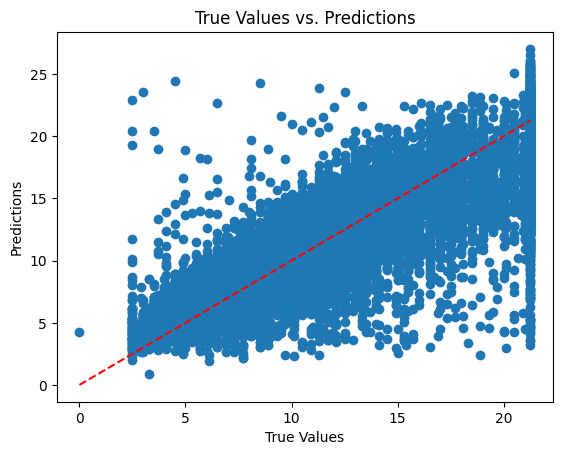

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

def plot_results(y_test, y_pred):
    y_test = np.array(y_test, dtype=float)
    y_pred = np.array(y_pred, dtype=float)

    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True Values vs. Predictions')
    plt.show()


# Assuming you have y_test and y_pred already defined
# y_test: true values
# y_pred: predicted values
plot_results(y_test, y_pred)

Mean Squared Error: 4.717552042434345
R-squared (R2): 0.8067158335441752
The accuracy of our model is 80.67%


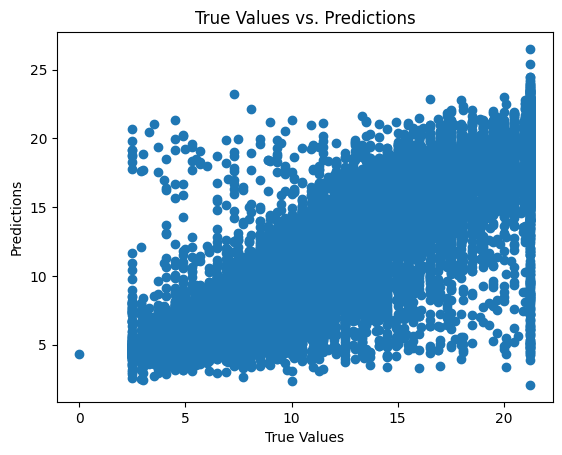

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_results(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True Values vs. Predictions')
    plt.show()

# Assume X_train, X_test, y_train, y_test are your training and testing data
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 3  # You can adjust this value

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
print("The accuracy of our model is {}%".format(round(r2, 4) *100))

# Plot results
plot_results(y_test, y_pred)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))


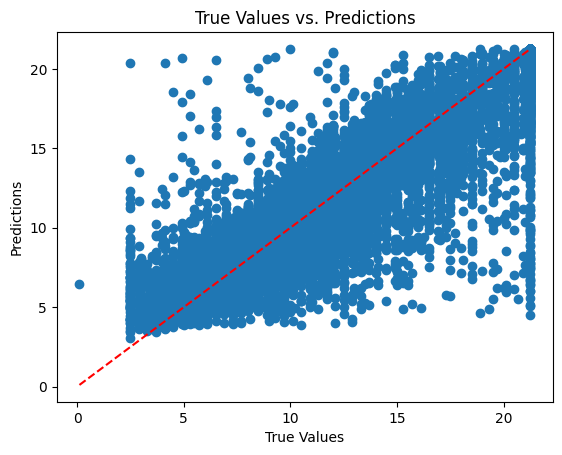

Mean Squared Error: 4.0723899022392525
R-squared (R2): 0.8363493381984894
The accuracy of our model is 83.63000000000001%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

def plot_results(y_test, rfrmodel_pred):
    y_test = np.array(y_test, dtype=float)
    rfrmodel_pred = np.array(rfrmodel_pred, dtype=float)

    plt.scatter(y_test, rfrmodel_pred)

    # Plot diagonal line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True Values vs. Predictions')
    plt.show()

# Assuming you have y_test and rfrmodel_pred already defined
# y_test: true values
# rfrmodel_pred: predicted values
plot_results(y_test, rfrmodel_pred)

# Calculate and print evaluation metrics
r2 = r2_score(y_test, rfrmodel_pred)
mse = mean_squared_error(y_test, rfrmodel_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)
print("The accuracy of our model is {}%".format(round(r2, 4) * 100))


In [ ]:
"""from math import radians, sin, cos, sqrt, atan2

def haversine_distance2(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    # Radius of the Earth in kilometers
    radius = 6371

    # Calculate the distance
    distance = radius * c
    return distance"""


'from math import radians, sin, cos, sqrt, atan2\n\ndef haversine_distance2(lon1, lat1, lon2, lat2):\n    # Convert latitude and longitude from degrees to radians\n    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])\n\n    # Haversine formula\n    dlon = lon2 - lon1\n    dlat = lat2 - lat1\n    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2\n    c = 2 * atan2(sqrt(a), sqrt(1-a))\n\n    # Radius of the Earth in kilometers\n    radius = 6371\n\n    # Calculate the distance\n    distance = radius * c\n    return distance'

In [ ]:
import joblib
import pickle
# Assuming your trained model object is named 'model'
# model = LinearRegression()
# model.fit(X_train, y_train)

# Save the trained model to a file
pickle.dump(rfrmodel, open('regression_model.sav','wb'))



In [ ]:
import joblib
import pandas as pd

# Load the linear regression model trained earlier
loaded_model = pickle.load(open('regression_model.sav','rb'))

# Ensure loaded model's attributes
#print("Model coefficients:", loaded_model.coef_)  # If coefficients exist

# Input data for prediction
input_data = {
    'pickup_datetime': '2015-06-27 23:20:17 UTC',
    'pickup_longitude': -73.9809494,
    'pickup_latitude':   40.759368896484375,
    'dropoff_longitude': -73.98259735,
    'dropoff_latitude': 40.75838088989258,
    'passenger_count': 2
}

# Convert pickup datetime string to datetime object
input_data['pickup_datetime'] = pd.to_datetime(input_data['pickup_datetime'])

# Feature engineering
input_data['year'] = input_data['pickup_datetime'].year
input_data['month'] = input_data['pickup_datetime'].month
input_data['day'] = input_data['pickup_datetime'].day
input_data['hour'] = input_data['pickup_datetime'].hour
input_data['minute'] = input_data['pickup_datetime'].minute
input_data['abs_diff_longitude'] = abs(input_data['dropoff_longitude'] - input_data['pickup_longitude'])
input_data['abs_diff_latitude'] = abs(input_data['dropoff_latitude'] - input_data['pickup_latitude'])
input_data['distance_km'] = haversine_distance(input_data['pickup_longitude'], input_data['pickup_latitude'],
                                                 input_data['dropoff_longitude'], input_data['dropoff_latitude'])

# Select relevant features for prediction
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count', 'abs_diff_longitude', 'abs_diff_latitude', 'year', 'month', 'day', 'hour', 'minute', 'distance_km']

# Arrange input features in the same order as used during model training
input_features = [input_data[feature] for feature in features]

# Debugging: Print input feature array
print("Input features:", input_features)

# Make prediction using the loaded model
prediction = loaded_model.predict([input_features])

print(prediction)


Input features: [-73.9809494, 40.759368896484375, -73.98259735, 40.75838088989258, 2, 0.0016479500000059488, 0.000988006591796875, 2015, 6, 27, 23, 20, 0.1770171715134536]
[6.1525]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#! pip install streamlit_option_menu

In [ ]:
#!wget -q -O - ipv4.icanhazip.com

In [ ]:
#! streamlit run Deployment_Streamlit.py & npx localtunnel --port 8501

In [ ]:
#!streamlit run Deployment_Streamlit.py